In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.ExcelFile("C:/Users/mahip/Downloads/Ind-vs-Eng-Test2.xlsx")

team_data = pd.read_excel(data, 'Teams')
team_data = team_data.dropna(how='all')

toss_result = list(team_data.tail(1)['India'])[0]
print(toss_result)

India win the toss and bat first.


In [3]:
innings_1_data = pd.read_excel(data, 'Innings-1')
innings_1_data = innings_1_data.dropna()

innings_2_data = pd.read_excel(data, 'Innings-2')
innings_2_data = innings_2_data.dropna()

innings_2_data['Over'] = innings_2_data['Over'].astype('object')
innings_2_data['Ball'] = innings_2_data['Ball'].astype('float64')
innings_2_data['RunRate'] = innings_2_data['RunRate'].astype('object')

innings_3_data = pd.read_excel(data, 'Innings-3')
innings_3_data = innings_3_data.dropna()

innings_4_data = pd.read_excel(data, 'Innings-4')
innings_4_data = innings_4_data.dropna()

innings_1_data['Runs'] = innings_1_data['Runs'].astype('int64')
innings_2_data['Runs'] = innings_2_data['Runs'].astype('int64')
innings_3_data['Runs'] = innings_3_data['Runs'].astype('int64')
innings_4_data['Runs'] = innings_4_data['Runs'].astype('int64')

In [4]:
day_1_data = pd.read_excel(data, 'Day-1')
day_1_data = day_1_data.dropna()
day_1_data = day_1_data.reset_index()

day_1_data['Over'] = day_1_data['Over'].astype('object')
day_1_data['Ball'] = day_1_data['Ball'].astype('float64')
day_1_data['RunRate'] = day_1_data['RunRate'].astype('object')

day_2_data = pd.read_excel(data, 'Day-2')
day_2_data = day_2_data.dropna()
day_2_data = day_2_data.reset_index()

day_2_data['Runs'] = day_2_data['Runs'].astype('int64')
day_2_data['Total Score'] = day_2_data['Total Score'].astype('int64')
day_2_data['Total Wickets'] = day_2_data['Total Wickets'].astype('int64')
day_2_data['RunRate'] = day_2_data['RunRate'].astype('object')

day_3_data = pd.read_excel(data, 'Day-3')
day_3_data = day_3_data.dropna()
day_3_data = day_3_data.reset_index()

day_3_data['Runs'] = day_3_data['Runs'].astype('int64')
day_3_data['Total Score'] = day_3_data['Total Score'].astype('int64')
day_3_data['Total Wickets'] = day_3_data['Total Wickets'].astype('int64')
day_3_data['RunRate'] = day_3_data['RunRate'].astype('object')

day_4_data = pd.read_excel(data, 'Day-4')
day_4_data = day_4_data.dropna()
day_4_data = day_4_data.reset_index()

day_4_data['Over'] = day_4_data['Over'].astype('object')
day_4_data['Ball'] = day_4_data['Ball'].astype('float64')
day_4_data['RunRate'] = day_4_data['RunRate'].astype('object')

In [5]:
batting_stats_ind_1 = {'Batsman': ['R. Sharma', 'S. Gill', 'C. Pujara', 'V. Kohli', 'A. Rahane', 'R. Pant', 'R. Ashwin', 'A. Patel', 'I. Sharma', 'K. Yadav', 'M. Siraj'], 'Runs': [0]*11, 'Balls Faced': [0]*11, 'Fours': [0]*11, 'Sixes': [0]*11, 'SR': [0]*11}
batting_stats_ind_1 = pd.DataFrame(batting_stats_ind_1)

batting_stats_eng_1 = {'Batsman': ['R. Burns', 'D. Sibley', 'D. Lawrence', 'J. Root', 'B. Stokes', 'O. Pope', 'B. Foakes', 'M. Ali', 'O. Stone', 'J. Leach', 'S. Broad'], 'Runs': [0]*11, 'Balls Faced': [0]*11, 'Fours': [0]*11, 'Sixes': [0]*11, 'SR': [0]*11}
batting_stats_eng_1 = pd.DataFrame(batting_stats_eng_1)

batting_stats_ind_2 = {'Batsman': ['R. Sharma', 'S. Gill', 'C. Pujara', 'V. Kohli', 'R. Pant', 'A. Rahane', 'A. Patel', 'R. Ashwin', 'K. Yadav', 'I. Sharma', 'M. Siraj'], 'Runs': [0]*11, 'Balls Faced': [0]*11, 'Fours': [0]*11, 'Sixes': [0]*11, 'SR': [0]*11}
batting_stats_ind_2 = pd.DataFrame(batting_stats_ind_2)

batting_stats_eng_2 = {'Batsman': ['R. Burns', 'D. Sibley', 'D. Lawrence', 'J. Leach', 'J. Root', 'B. Stokes', 'O. Pope', 'B. Foakes', 'M. Ali', 'O. Stone', 'S. Broad'], 'Runs': [0]*11, 'Balls Faced': [0]*11, 'Fours': [0]*11, 'Sixes': [0]*11, 'SR': [0]*11}
batting_stats_eng_2 = pd.DataFrame(batting_stats_eng_2)

extras = ['NB', 'WD', 'LB', 'BYES', 'PEN']

extras_data_1 = innings_1_data[innings_1_data['Outcome'].str.contains('|'.join(extras))]
extras_data_2 = innings_2_data[innings_2_data['Outcome'].str.contains('|'.join(extras))]
extras_data_3 = innings_3_data[innings_3_data['Outcome'].str.contains('|'.join(extras))]
extras_data_4 = innings_4_data[innings_4_data['Outcome'].str.contains('|'.join(extras))]

extras_stats_1 = {'BYES': np.sum(extras_data_1.loc[extras_data_1['Outcome'] == 'BYES']['Runs']), 'LEG BYES': np.sum(extras_data_1.loc[extras_data_1['Outcome'] == 'LB']['Runs']), 'WIDES': np.sum(extras_data_1.loc[extras_data_1['Outcome'] == 'WD']['Runs']), 'NO BALLS': len(extras_data_1[extras_data_1['Outcome'].str.contains("NB")]), 'PENALTY': np.sum(extras_data_1.loc[extras_data_1['Outcome'] == 'PEN']['Runs'])}
extras_stats_2 = {'BYES': np.sum(extras_data_2.loc[extras_data_2['Outcome'] == 'BYES']['Runs']), 'LEG BYES': np.sum(extras_data_2.loc[extras_data_2['Outcome'] == 'LB']['Runs']), 'WIDES': np.sum(extras_data_2.loc[extras_data_2['Outcome'] == 'WD']['Runs']), 'NO BALLS': len(extras_data_2[extras_data_2['Outcome'].str.contains("NB")]), 'PENALTY': np.sum(extras_data_2.loc[extras_data_2['Outcome'] == 'PEN']['Runs'])}
extras_stats_3 = {'BYES': np.sum(extras_data_3.loc[extras_data_3['Outcome'] == 'BYES']['Runs']), 'LEG BYES': np.sum(extras_data_3.loc[extras_data_3['Outcome'] == 'LB']['Runs']), 'WIDES': np.sum(extras_data_3.loc[extras_data_3['Outcome'] == 'WD']['Runs']), 'NO BALLS': len(extras_data_3[extras_data_3['Outcome'].str.contains("NB")]), 'PENALTY': np.sum(extras_data_3.loc[extras_data_3['Outcome'] == 'PEN']['Runs'])}
extras_stats_4 = {'BYES': np.sum(extras_data_4.loc[extras_data_4['Outcome'] == 'BYES']['Runs']), 'LEG BYES': np.sum(extras_data_4.loc[extras_data_4['Outcome'] == 'LB']['Runs']), 'WIDES': np.sum(extras_data_4.loc[extras_data_4['Outcome'] == 'WD']['Runs']), 'NO BALLS': len(extras_data_4[extras_data_4['Outcome'].str.contains("NB")]), 'PENALTY': np.sum(extras_data_4.loc[extras_data_4['Outcome'] == 'PEN']['Runs'])}

print('First Innings Extras:  ', extras_stats_1)
print('Second Innings Extras: ', extras_stats_2)
print('Third Innings Extras:  ', extras_stats_3)
print('Fourth Innings Extras: ', extras_stats_4)

First Innings Extras:   {'BYES': 0, 'LEG BYES': 0, 'WIDES': 0, 'NO BALLS': 0, 'PENALTY': 0}
Second Innings Extras:  {'BYES': 4, 'LEG BYES': 4, 'WIDES': 0, 'NO BALLS': 1, 'PENALTY': 0}
Third Innings Extras:   {'BYES': 5, 'LEG BYES': 15, 'WIDES': 0, 'NO BALLS': 0, 'PENALTY': 0}
Fourth Innings Extras:  {'BYES': 6, 'LEG BYES': 1, 'WIDES': 0, 'NO BALLS': 0, 'PENALTY': 0}


In [6]:
for b in batting_stats_ind_1['Batsman']:
    batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'Balls Faced'] = len(innings_1_data.loc[innings_1_data['Striker'] == b]) - len(innings_1_data.loc[innings_1_data['Striker'] == b].loc[innings_1_data[innings_1_data['Striker'] == b]['Outcome'] == 'WD'])
    batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'Fours'] = len(innings_1_data.loc[innings_1_data['Striker'] == b].loc[innings_1_data.loc[innings_1_data['Striker'] == b]['Outcome'] == 'FOUR']) + len(extras_data_1.loc[extras_data_1['Striker'] == b].loc[extras_data_1.loc[extras_data_1['Striker'] == b]['Outcome'].str.contains("FOUR NB")])
    batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'Sixes'] = len(innings_1_data.loc[innings_1_data['Striker'] == b].loc[innings_1_data.loc[innings_1_data['Striker'] == b]['Outcome'] == 'SIX']) + len(extras_data_1.loc[extras_data_1['Striker'] == b].loc[extras_data_1.loc[extras_data_1['Striker'] == b]['Outcome'].str.contains("SIX NB")])
    batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'Runs'] = int(np.sum(innings_1_data.loc[innings_1_data['Striker'] == b]['Runs'])) - len(extras_data_1.loc[extras_data_1['Striker'] == b].loc[extras_data_1.loc[extras_data_1['Striker'] == b]['Outcome'].str.contains("NB|WD")]) - np.sum(extras_data_1.loc[extras_data_1['Striker'] == b].loc[extras_data_1.loc[extras_data_1['Striker'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs']) 
    batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'SR'] = round((batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'Runs'] / batting_stats_ind_1.loc[batting_stats_ind_1['Batsman'] == b, 'Balls Faced'] * 100), 2)

for b in batting_stats_eng_1['Batsman']:
    batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'Balls Faced'] = len(innings_2_data.loc[innings_2_data['Striker'] == b]) - len(innings_2_data.loc[innings_2_data['Striker'] == b].loc[innings_2_data[innings_2_data['Striker'] == b]['Outcome'] == 'WD'])
    batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'Fours'] = len(innings_2_data.loc[innings_2_data['Striker'] == b].loc[innings_2_data.loc[innings_2_data['Striker'] == b]['Outcome'] == 'FOUR']) + len(extras_data_2.loc[extras_data_2['Striker'] == b].loc[extras_data_2.loc[extras_data_2['Striker'] == b]['Outcome'].str.contains("FOUR NB")])
    batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'Sixes'] = len(innings_2_data.loc[innings_2_data['Striker'] == b].loc[innings_2_data.loc[innings_2_data['Striker'] == b]['Outcome'] == 'SIX']) + len(extras_data_2.loc[extras_data_2['Striker'] == b].loc[extras_data_2.loc[extras_data_2['Striker'] == b]['Outcome'].str.contains("SIX NB")])
    batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'Runs'] = int(np.sum(innings_2_data.loc[innings_2_data['Striker'] == b]['Runs'])) - len(extras_data_2.loc[extras_data_2['Striker'] == b].loc[extras_data_2.loc[extras_data_2['Striker'] == b]['Outcome'].str.contains("NB|WD")]) - np.sum(extras_data_2.loc[extras_data_2['Striker'] == b].loc[extras_data_2.loc[extras_data_2['Striker'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs']) 
    batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'SR'] = round((batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'Runs'] / batting_stats_eng_1.loc[batting_stats_eng_1['Batsman'] == b, 'Balls Faced'] * 100), 2)

for b in batting_stats_ind_2['Batsman']:
    batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'Balls Faced'] = len(innings_3_data.loc[innings_3_data['Striker'] == b]) - len(innings_3_data.loc[innings_3_data['Striker'] == b].loc[innings_3_data[innings_3_data['Striker'] == b]['Outcome'] == 'WD'])
    batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'Fours'] = len(innings_3_data.loc[innings_3_data['Striker'] == b].loc[innings_3_data.loc[innings_3_data['Striker'] == b]['Outcome'] == 'FOUR']) + len(extras_data_3.loc[extras_data_3['Striker'] == b].loc[extras_data_3.loc[extras_data_3['Striker'] == b]['Outcome'].str.contains("FOUR NB")])
    batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'Sixes'] = len(innings_3_data.loc[innings_3_data['Striker'] == b].loc[innings_3_data.loc[innings_3_data['Striker'] == b]['Outcome'] == 'SIX']) + len(extras_data_3.loc[extras_data_3['Striker'] == b].loc[extras_data_3.loc[extras_data_3['Striker'] == b]['Outcome'].str.contains("SIX NB")])
    batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'Runs'] = int(np.sum(innings_3_data.loc[innings_3_data['Striker'] == b]['Runs'])) - len(extras_data_3.loc[extras_data_3['Striker'] == b].loc[extras_data_3.loc[extras_data_3['Striker'] == b]['Outcome'].str.contains("NB|WD")]) - np.sum(extras_data_3.loc[extras_data_3['Striker'] == b].loc[extras_data_3.loc[extras_data_3['Striker'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs']) 
    batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'SR'] = round((batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'Runs'] / batting_stats_ind_2.loc[batting_stats_ind_2['Batsman'] == b, 'Balls Faced'] * 100), 2)

for b in batting_stats_eng_2['Batsman']:
    batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'Balls Faced'] = len(innings_4_data.loc[innings_4_data['Striker'] == b]) - len(innings_4_data.loc[innings_4_data['Striker'] == b].loc[innings_4_data[innings_4_data['Striker'] == b]['Outcome'] == 'WD'])
    batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'Fours'] = len(innings_4_data.loc[innings_4_data['Striker'] == b].loc[innings_4_data.loc[innings_4_data['Striker'] == b]['Outcome'] == 'FOUR']) + len(extras_data_4.loc[extras_data_4['Striker'] == b].loc[extras_data_4.loc[extras_data_4['Striker'] == b]['Outcome'].str.contains("FOUR NB")])
    batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'Sixes'] = len(innings_4_data.loc[innings_4_data['Striker'] == b].loc[innings_4_data.loc[innings_4_data['Striker'] == b]['Outcome'] == 'SIX']) + len(extras_data_4.loc[extras_data_4['Striker'] == b].loc[extras_data_4.loc[extras_data_4['Striker'] == b]['Outcome'].str.contains("SIX NB")])
    batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'Runs'] = int(np.sum(innings_4_data.loc[innings_4_data['Striker'] == b]['Runs'])) - len(extras_data_4.loc[extras_data_4['Striker'] == b].loc[extras_data_4.loc[extras_data_4['Striker'] == b]['Outcome'].str.contains("NB|WD")]) - np.sum(extras_data_4.loc[extras_data_4['Striker'] == b].loc[extras_data_4.loc[extras_data_4['Striker'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs']) 
    batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'SR'] = round((batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'Runs'] / batting_stats_eng_2.loc[batting_stats_eng_2['Batsman'] == b, 'Balls Faced'] * 100), 2)


In [7]:
print('\033[1m' + "India's Batting Scorecard 1st Innings\n" + '\033[0m')
print(batting_stats_ind_1.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Batting Scorecard 1st Innings\n" + '\033[0m')
print(batting_stats_eng_1.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "India's Batting Scorecard 2nd Innings\n" + '\033[0m')
print(batting_stats_ind_2.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Batting Scorecard 2nd Innings\n" + '\033[0m')
print(batting_stats_eng_2.to_string(index=False))

India's Batting Scorecard 1st Innings

   Batsman  Runs  Balls Faced  Fours  Sixes      SR
 R. Sharma   161          231     18      2   69.70
   S. Gill     0            3      0      0    0.00
 C. Pujara    21           58      2      0   36.21
  V. Kohli     0            5      0      0    0.00
 A. Rahane    67          149      9      0   44.97
   R. Pant    58           77      7      3   75.32
 R. Ashwin    13           19      1      0   68.42
  A. Patel     5           14      1      0   35.71
 I. Sharma     0            2      0      0    0.00
  K. Yadav     0           15      0      0    0.00
  M. Siraj     4            2      1      0  200.00




England's Batting Scorecard 1st Innings

     Batsman  Runs  Balls Faced  Fours  Sixes     SR
    R. Burns     0            3      0      0   0.00
   D. Sibley    16           25      3      0  64.00
 D. Lawrence     9           52      0      0  17.31
     J. Root     6           12      0      0  50.00
   B. Stokes    18         

In [8]:
bowling_stats_eng_1 = {'Bowler': ['S. Broad', 'O. Stone', 'J. Leach', 'B. Stokes', 'M. Ali', 'J. Root'], 'Overs': ['']*len(innings_1_data.groupby(['Bowler'])), 'Maidens': [0]*len(innings_1_data.groupby(['Bowler'])), 'Runs': [0]*len(innings_1_data.groupby(['Bowler'])), 'Wickets': [0]*len(innings_1_data.groupby(['Bowler'])), 'Economy Rate': [0]*len(innings_1_data.groupby(['Bowler']))}
bowling_stats_eng_1 = pd.DataFrame(bowling_stats_eng_1)

bowling_stats_ind_1 = {'Bowler': ['I. Sharma', 'R. Ashwin', 'A. Patel', 'K. Yadav', 'M. Siraj'], 'Overs': ['']*len(innings_2_data.groupby(['Bowler'])), 'Maidens': [0]*len(innings_2_data.groupby(['Bowler'])), 'Runs': [0]*len(innings_2_data.groupby(['Bowler'])), 'Wickets': [0]*len(innings_2_data.groupby(['Bowler'])), 'Economy Rate': [0]*len(innings_2_data.groupby(['Bowler']))}
bowling_stats_ind_1 = pd.DataFrame(bowling_stats_ind_1)

bowling_stats_eng_2 = {'Bowler': ['O. Stone', 'J. Leach', 'M. Ali', 'J. Root', 'S. Broad', 'D. Lawrence'], 'Overs': ['']*len(innings_3_data.groupby(['Bowler'])), 'Maidens': [0]*len(innings_3_data.groupby(['Bowler'])), 'Runs': [0]*len(innings_3_data.groupby(['Bowler'])), 'Wickets': [0]*len(innings_3_data.groupby(['Bowler'])), 'Economy Rate': [0]*len(innings_3_data.groupby(['Bowler']))}
bowling_stats_eng_2 = pd.DataFrame(bowling_stats_eng_2)

bowling_stats_ind_2 = {'Bowler': ['I. Sharma', 'A. Patel', 'R. Ashwin', 'M. Siraj', 'K. Yadav'], 'Overs': ['']*len(innings_4_data.groupby(['Bowler'])), 'Maidens': [0]*len(innings_4_data.groupby(['Bowler'])), 'Runs': [0]*len(innings_4_data.groupby(['Bowler'])), 'Wickets': [0]*len(innings_4_data.groupby(['Bowler'])), 'Economy Rate': [0]*len(innings_4_data.groupby(['Bowler']))}
bowling_stats_ind_2 = pd.DataFrame(bowling_stats_ind_2)

In [9]:
innings_1_data_maiden = innings_1_data.loc[~innings_1_data['Outcome'].str.contains("LB|BYES|PEN")]
innings_2_data_maiden = innings_2_data.loc[~innings_2_data['Outcome'].str.contains("LB|BYES|PEN")]
innings_3_data_maiden = innings_3_data.loc[~innings_3_data['Outcome'].str.contains("LB|BYES|PEN")]
innings_4_data_maiden = innings_4_data.loc[~innings_4_data['Outcome'].str.contains("LB|BYES|PEN")]

for b in bowling_stats_eng_1['Bowler']:
    bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b, 'Overs'] = (str(len(np.unique(innings_1_data.loc[innings_1_data['Bowler'] == b]['Over'])) - 1) + '.' + (str([i for i in innings_1_data.loc[innings_1_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0][0]) if [i for i in innings_1_data.loc[innings_1_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else '0') if [i for i in innings_1_data.loc[innings_1_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else (str(len(np.unique(innings_1_data.loc[innings_1_data['Bowler'] == b]['Over'])))))
    bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b, 'Runs'] = np.sum(innings_1_data.loc[innings_1_data['Bowler'] == b]['Runs']) - np.sum(extras_data_1.loc[extras_data_1['Bowler'] == b].loc[extras_data_1.loc[extras_data_1['Bowler'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs'])
    bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b, 'Wickets'] = len(innings_1_data.loc[innings_1_data['Outcome'] == 'OUT'].loc[innings_1_data[innings_1_data['Outcome'] == 'OUT']['Bowler'] == b]) - len(innings_1_data.loc[innings_1_data['Observation'] == 'RUN OUT'].loc[innings_1_data[innings_1_data['Observation'] == 'RUN OUT']['Bowler'] == b])
    bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b, 'Economy Rate'] = round((float(bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b]['Runs'] / float(bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b]['Overs']))), 2)
    bowling_stats_eng_1.loc[bowling_stats_eng_1['Bowler'] == b, 'Maidens'] = len([1 for i in innings_1_data_maiden.loc[innings_1_data_maiden['Bowler'] == b].groupby(['Over']).sum()['Runs'] if i == 0])

for b in bowling_stats_ind_1['Bowler']:
    bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b, 'Overs'] = (str(len(np.unique(innings_2_data.loc[innings_2_data['Bowler'] == b]['Over'])) - 1) + '.' + (str([i for i in innings_2_data.loc[innings_2_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0][0]) if [i for i in innings_2_data.loc[innings_2_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else '0') if [i for i in innings_2_data.loc[innings_2_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else (str(len(np.unique(innings_2_data.loc[innings_2_data['Bowler'] == b]['Over'])))))
    bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b, 'Runs'] = np.sum(innings_2_data.loc[innings_2_data['Bowler'] == b]['Runs']) - np.sum(extras_data_2.loc[extras_data_2['Bowler'] == b].loc[extras_data_2.loc[extras_data_2['Bowler'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs'])
    bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b, 'Wickets'] = len(innings_2_data.loc[innings_2_data['Outcome'] == 'OUT'].loc[innings_2_data[innings_2_data['Outcome'] == 'OUT']['Bowler'] == b]) - len(innings_2_data.loc[innings_2_data['Observation'] == 'RUN OUT'].loc[innings_2_data[innings_2_data['Observation'] == 'RUN OUT']['Bowler'] == b])
    bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b, 'Economy Rate'] = round((float(bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b]['Runs'] / float(bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b]['Overs']))), 2)
    bowling_stats_ind_1.loc[bowling_stats_ind_1['Bowler'] == b, 'Maidens'] = len([1 for i in innings_2_data_maiden.loc[innings_2_data_maiden['Bowler'] == b].groupby(['Over']).sum()['Runs'] if i == 0])

for b in bowling_stats_eng_2['Bowler']:
    bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b, 'Overs'] = (str(len(np.unique(innings_3_data.loc[innings_3_data['Bowler'] == b]['Over'])) - 1) + '.' + (str([i for i in innings_3_data.loc[innings_3_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0][0]) if [i for i in innings_3_data.loc[innings_3_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else '0') if [i for i in innings_3_data.loc[innings_3_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else (str(len(np.unique(innings_3_data.loc[innings_3_data['Bowler'] == b]['Over'])))))
    bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b, 'Runs'] = np.sum(innings_3_data.loc[innings_3_data['Bowler'] == b]['Runs']) - np.sum(extras_data_3.loc[extras_data_3['Bowler'] == b].loc[extras_data_3.loc[extras_data_3['Bowler'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs'])
    bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b, 'Wickets'] = len(innings_3_data.loc[innings_3_data['Outcome'] == 'OUT'].loc[innings_3_data[innings_3_data['Outcome'] == 'OUT']['Bowler'] == b]) - len(innings_3_data.loc[innings_3_data['Observation'] == 'RUN OUT'].loc[innings_3_data[innings_3_data['Observation'] == 'RUN OUT']['Bowler'] == b])
    bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b, 'Economy Rate'] = round((float(bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b]['Runs'] / float(bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b]['Overs']))), 2)
    bowling_stats_eng_2.loc[bowling_stats_eng_2['Bowler'] == b, 'Maidens'] = len([1 for i in innings_3_data_maiden.loc[innings_3_data_maiden['Bowler'] == b].groupby(['Over']).sum()['Runs'] if i == 0])

for b in bowling_stats_ind_2['Bowler']:
    bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b, 'Overs'] = (str(len(np.unique(innings_4_data.loc[innings_4_data['Bowler'] == b]['Over'])) - 1) + '.' + (str([i for i in innings_4_data.loc[innings_4_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0][0]) if [i for i in innings_4_data.loc[innings_4_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else '0') if [i for i in innings_4_data.loc[innings_4_data['Bowler'] == b].groupby(['Over']).count()['Ball'].apply(lambda x: x if x < 6 else 0) if i != 0] != [] else (str(len(np.unique(innings_4_data.loc[innings_4_data['Bowler'] == b]['Over'])))))
    bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b, 'Runs'] = np.sum(innings_4_data.loc[innings_4_data['Bowler'] == b]['Runs']) - np.sum(extras_data_4.loc[extras_data_4['Bowler'] == b].loc[extras_data_4.loc[extras_data_4['Bowler'] == b]['Outcome'].str.contains("LB|BYES|PEN")]['Runs'])
    bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b, 'Wickets'] = len(innings_4_data.loc[innings_4_data['Outcome'] == 'OUT'].loc[innings_4_data[innings_4_data['Outcome'] == 'OUT']['Bowler'] == b]) - len(innings_4_data.loc[innings_4_data['Observation'] == 'RUN OUT'].loc[innings_4_data[innings_4_data['Observation'] == 'RUN OUT']['Bowler'] == b])
    bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b, 'Economy Rate'] = round((float(bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b]['Runs'] / float(bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b]['Overs']))), 2)
    bowling_stats_ind_2.loc[bowling_stats_ind_2['Bowler'] == b, 'Maidens'] = len([1 for i in innings_4_data_maiden.loc[innings_4_data_maiden['Bowler'] == b].groupby(['Over']).sum()['Runs'] if i == 0])


In [10]:
print('\033[1m' + "England's Bowling Scorecard 1st Innings\n" + '\033[0m')
print(bowling_stats_eng_1.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "India's Bowling Scorecard 1st Innings\n" + '\033[0m')
print(bowling_stats_ind_1.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Bowling Scorecard 2nd Innings\n" + '\033[0m')
print(bowling_stats_eng_2.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "India's Bowling Scorecard 2nd Innings\n" + '\033[0m')
print(bowling_stats_ind_2.to_string(index=False))

England's Bowling Scorecard 1st Innings

    Bowler Overs  Maidens  Runs  Wickets  Economy Rate
  S. Broad    11        2    37        0          3.36
  O. Stone  15.5        5    47        3          3.03
  J. Leach    27        3    78        2          2.89
 B. Stokes     2        0    16        0          8.00
    M. Ali    29        3   128        4          4.41
   J. Root    11        3    23        1          2.09




India's Bowling Scorecard 1st Innings

    Bowler Overs  Maidens  Runs  Wickets  Economy Rate
 I. Sharma     5        1    22        2          4.40
 R. Ashwin  23.5        4    43        5          1.83
  A. Patel    20        3    40        2          2.00
  K. Yadav     6        1    16        0          2.67
  M. Siraj     5        4     5        1          1.00




England's Bowling Scorecard 2nd Innings

      Bowler Overs  Maidens  Runs  Wickets  Economy Rate
    O. Stone   6.5        1    21        1          3.23
    J. Leach    33        6   100        4

In [11]:
fall_of_wickets_1 = pd.DataFrame({'Batsman': [] * len(innings_1_data.loc[innings_1_data['Outcome'] == 'OUT']), 'Score': [] * len(innings_1_data.loc[innings_1_data['Outcome'] == 'OUT']), 'Over': [] * len(innings_1_data.loc[innings_1_data['Outcome'] == 'OUT'])})
fall_of_wickets_1['Batsman'] = innings_1_data.loc[innings_1_data['Outcome'] == 'OUT']['Striker']
fall_of_wickets_1['Score'] = [str(t) + '-' + str(i) for i, t in enumerate(innings_1_data.loc[innings_1_data['Outcome'] == 'OUT']['Total Score'], start = 1)]
fall_of_wickets_1['Over'] = [str(row['Over']) + '.' + str(row['Ball'])[:-2] for index, row in innings_1_data.loc[innings_1_data['Outcome'] == 'OUT'].iterrows()]

fall_of_wickets_2 = pd.DataFrame({'Batsman': [] * len(innings_2_data.loc[innings_2_data['Outcome'] == 'OUT']), 'Score': [] * len(innings_2_data.loc[innings_2_data['Outcome'] == 'OUT']), 'Over': [] * len(innings_2_data.loc[innings_2_data['Outcome'] == 'OUT'])})
fall_of_wickets_2['Batsman'] = innings_2_data.loc[innings_2_data['Outcome'] == 'OUT']['Striker']
fall_of_wickets_2['Score'] = [str(t) + '-' + str(i) for i, t in enumerate(innings_2_data.loc[innings_2_data['Outcome'] == 'OUT']['Total Score'], start = 1)]
fall_of_wickets_2['Over'] = [str(row['Over']) + '.' + str(row['Ball']) [:-2] for index, row in innings_2_data.loc[innings_2_data['Outcome'] == 'OUT'].iterrows()]

fall_of_wickets_3 = pd.DataFrame({'Batsman': [] * len(innings_3_data.loc[innings_3_data['Outcome'] == 'OUT']), 'Score': [] * len(innings_3_data.loc[innings_3_data['Outcome'] == 'OUT']), 'Over': [] * len(innings_3_data.loc[innings_3_data['Outcome'] == 'OUT'])})
fall_of_wickets_3['Batsman'] = innings_3_data.loc[innings_3_data['Outcome'] == 'OUT']['Striker']
fall_of_wickets_3['Score'] = [str(t) + '-' + str(i) for i, t in enumerate(innings_3_data.loc[innings_3_data['Outcome'] == 'OUT']['Total Score'], start = 1)]
fall_of_wickets_3['Over'] = [str(row['Over']) + '.' + str(row['Ball'])[:-2] for index, row in innings_3_data.loc[innings_3_data['Outcome'] == 'OUT'].iterrows()]

fall_of_wickets_4 = pd.DataFrame({'Batsman': [] * len(innings_4_data.loc[innings_4_data['Outcome'] == 'OUT']), 'Score': [] * len(innings_4_data.loc[innings_4_data['Outcome'] == 'OUT']), 'Over': [] * len(innings_4_data.loc[innings_4_data['Outcome'] == 'OUT'])})
fall_of_wickets_4['Batsman'] = innings_4_data.loc[innings_4_data['Outcome'] == 'OUT']['Striker']
fall_of_wickets_4['Score'] = [str(t) + '-' + str(i) for i, t in enumerate(innings_4_data.loc[innings_4_data['Outcome'] == 'OUT']['Total Score'], start = 1)]
fall_of_wickets_4['Over'] = [str(row['Over']) + '.' + str(row['Ball'])[:-2] for index, row in innings_4_data.loc[innings_4_data['Outcome'] == 'OUT'].iterrows()]

print('\033[1m' + "India's Fall of Wickets 1st Innings\n" + '\033[0m')
print(fall_of_wickets_1.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Fall of Wickets 1st Innings\n" + '\033[0m')
print(fall_of_wickets_2.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "India's Fall of Wickets 2nd Innings\n" + '\033[0m')
print(fall_of_wickets_3.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Fall of Wickets 2nd Innings\n" + '\033[0m')
print(fall_of_wickets_4.to_string(index=False))

India's Fall of Wickets 1st Innings

   Batsman   Score  Over
   S. Gill     0-1   1.3
 C. Pujara    85-2  20.2
  V. Kohli    86-3  21.2
 R. Sharma   248-4  72.6
 A. Rahane   249-5  75.2
 R. Ashwin   284-6  82.3
  A. Patel   301-7  89.2
 I. Sharma   301-8  89.4
  K. Yadav   325-9  95.3
  M. Siraj  329-10  95.5




England's Fall of Wickets 1st Innings

     Batsman   Score  Over
    R. Burns     0-1   0.3
   D. Sibley    16-2   7.2
     J. Root    23-3  10.3
 D. Lawrence    39-4  17.6
   B. Stokes    52-5  23.2
     O. Pope    87-6  38.1
      M. Ali   105-7  48.1
    O. Stone   106-8  49.2
    J. Leach   131-9  58.5
    S. Broad  134-10  59.5




India's Fall of Wickets 2nd Innings

   Batsman   Score  Over
   S. Gill    42-1  11.2
 C. Pujara    55-2  18.6
 R. Sharma    55-3  21.1
   R. Pant    65-4  25.3
 A. Rahane    86-5  30.3
  A. Patel   106-6  36.1
  V. Kohli   202-7  65.4
  K. Yadav   210-8  67.6
 I. Sharma   237-9  76.4
 R. Ashwin  286-10  85.5




England's Fall of Wickets 2n

In [12]:
partnership_data_1 = pd.DataFrame({'Wicket': [str(i) for i in range(1, 11)], 'Batsmen': [str(row['Striker']) + '-' + str(row['Non-Striker']) for index, row in innings_1_data.loc[innings_1_data['Outcome'] == 'OUT'].iterrows()], 'Runs': [(int(n) if i == 0 else int([p.split(sep='-')[0] for p in fall_of_wickets_1['Score']][i]) - int([p.split(sep='-')[0] for p in fall_of_wickets_1['Score']][i-1])) for i, n in enumerate([p.split(sep='-')[0] for p in fall_of_wickets_1['Score']])]})
partnership_data_2 = pd.DataFrame({'Wicket': [str(i) for i in range(1, 11)], 'Batsmen': [str(row['Striker']) + '-' + str(row['Non-Striker']) for index, row in innings_2_data.loc[innings_2_data['Outcome'] == 'OUT'].iterrows()], 'Runs': [(int(n) if i == 0 else int([p.split(sep='-')[0] for p in fall_of_wickets_2['Score']][i]) - int([p.split(sep='-')[0] for p in fall_of_wickets_2['Score']][i-1])) for i, n in enumerate([p.split(sep='-')[0] for p in fall_of_wickets_2['Score']])]})
partnership_data_3 = pd.DataFrame({'Wicket': [str(i) for i in range(1, 11)], 'Batsmen': [str(row['Striker']) + '-' + str(row['Non-Striker']) for index, row in innings_3_data.loc[innings_3_data['Outcome'] == 'OUT'].iterrows()], 'Runs': [(int(n) if i == 0 else int([p.split(sep='-')[0] for p in fall_of_wickets_3['Score']][i]) - int([p.split(sep='-')[0] for p in fall_of_wickets_3['Score']][i-1])) for i, n in enumerate([p.split(sep='-')[0] for p in fall_of_wickets_3['Score']])]})
partnership_data_4 = pd.DataFrame({'Wicket': [str(i) for i in range(1, 11)], 'Batsmen': [str(row['Striker']) + '-' + str(row['Non-Striker']) for index, row in innings_4_data.loc[innings_4_data['Outcome'] == 'OUT'].iterrows()], 'Runs': [(int(n) if i == 0 else int([p.split(sep='-')[0] for p in fall_of_wickets_4['Score']][i]) - int([p.split(sep='-')[0] for p in fall_of_wickets_4['Score']][i-1])) for i, n in enumerate([p.split(sep='-')[0] for p in fall_of_wickets_4['Score']])]})

In [13]:
print('\033[1m' + "India's Partnerships 1st Innings\n" + '\033[0m')
print(partnership_data_1.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Partnerships 1st Innings\n" + '\033[0m')
print(partnership_data_2.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "India's Partnerships 2nd Innings\n" + '\033[0m')
print(partnership_data_3.to_string(index=False))
print('\n\n\n')
print('\033[1m' + "England's Partnerships 2nd Innings\n" + '\033[0m')
print(partnership_data_4.to_string(index=False))

India's Partnerships 1st Innings

Wicket              Batsmen  Runs
     1    S. Gill-R. Sharma     0
     2  C. Pujara-R. Sharma    85
     3   V. Kohli-R. Sharma     1
     4  R. Sharma-A. Rahane   162
     5    A. Rahane-R. Pant     1
     6    R. Ashwin-R. Pant    35
     7     A. Patel-R. Pant    17
     8    I. Sharma-R. Pant     0
     9     K. Yadav-R. Pant    24
    10     M. Siraj-R. Pant     4




England's Partnerships 1st Innings

Wicket                Batsmen  Runs
     1     R. Burns-D. Sibley     0
     2  D. Sibley-D. Lawrence    16
     3    J. Root-D. Lawrence     7
     4  D. Lawrence-B. Stokes    16
     5      B. Stokes-O. Pope    13
     6      O. Pope-B. Foakes    35
     7       M. Ali-B. Foakes    18
     8     O. Stone-B. Foakes     1
     9     J. Leach-B. Foakes    25
    10     S. Broad-B. Foakes     3




India's Partnerships 2nd Innings

Wicket              Batsmen  Runs
     1    S. Gill-R. Sharma    42
     2  C. Pujara-R. Sharma    13
     3   R. Shar

In [14]:
day_1_data_first_session = day_1_data.iloc[:day_1_data.loc[day_1_data['Key Observation'].str.contains("LUNCH")].index[0]+1]
day_1_data_second_session = day_1_data.iloc[day_1_data.loc[day_1_data['Key Observation'].str.contains("LUNCH")].index[0]+1:day_1_data.loc[day_1_data['Key Observation'].str.contains("TEA")].index[0]+1]
day_1_data_third_session = day_1_data.iloc[day_1_data.loc[day_1_data['Key Observation'].str.contains("TEA")].index[0]+1:day_1_data.loc[day_1_data['Key Observation'].str.contains("STUMPS")].index[0]+1]

print("DAY 1\n")

day_1_data_session = pd.DataFrame({'Overs': [len(day_1_data_first_session.groupby(['Over']).count()), len(day_1_data_second_session.groupby(['Over']).count()), len(day_1_data_third_session.groupby(['Over']).count())], 'Runs': [sum(day_1_data_first_session['Runs']), sum(day_1_data_second_session['Runs']), sum(day_1_data_third_session['Runs'])], 'Wickets': [len(day_1_data_first_session.loc[day_1_data_first_session['Outcome'] == 'OUT']), len(day_1_data_second_session.loc[day_1_data_second_session['Outcome'] == 'OUT']), len(day_1_data_third_session.loc[day_1_data_third_session['Outcome'] == 'OUT'])]}, index = ['First Session', 'Second Session', 'Third Session'])
print(day_1_data_session)


day_2_data_first_session = day_2_data.iloc[:day_2_data.loc[day_2_data['Key Observation'].str.contains("LUNCH")].index[0]+1]
day_2_data_second_session = day_2_data.iloc[day_2_data.loc[day_2_data['Key Observation'].str.contains("LUNCH")].index[0]+1:day_2_data.loc[day_2_data['Key Observation'].str.contains("TEA")].index[0]+1]
day_2_data_third_session = day_2_data.iloc[day_2_data.loc[day_2_data['Key Observation'].str.contains("TEA")].index[0]+1:day_2_data.loc[day_2_data['Key Observation'].str.contains("STUMPS")].index[0]+1]

print("\nDAY 2\n")

day_2_data_session = pd.DataFrame({'Overs': [len(day_2_data_first_session.groupby(['Over']).count()), len(day_2_data_second_session.groupby(['Over']).count()), len(day_2_data_third_session.groupby(['Over']).count())], 'Runs': [sum(day_2_data_first_session['Runs']), sum(day_2_data_second_session['Runs']), sum(day_2_data_third_session['Runs'])], 'Wickets': [len(day_2_data_first_session.loc[day_2_data_first_session['Outcome'] == 'OUT']), len(day_2_data_second_session.loc[day_2_data_second_session['Outcome'] == 'OUT']), len(day_2_data_third_session.loc[day_2_data_third_session['Outcome'] == 'OUT'])]}, index = ['First Session', 'Second Session', 'Third Session'])

print(day_2_data_session)

day_3_data_first_session = day_3_data.iloc[:day_3_data.loc[day_3_data['Key Observation'].str.contains("LUNCH")].index[0]+1]
day_3_data_second_session = day_3_data.iloc[day_3_data.loc[day_3_data['Key Observation'].str.contains("LUNCH")].index[0]+1:day_3_data.loc[day_3_data['Key Observation'].str.contains("TEA")].index[0]+1]
day_3_data_third_session = day_3_data.iloc[day_3_data.loc[day_3_data['Key Observation'].str.contains("TEA")].index[0]+1:day_3_data.loc[day_3_data['Key Observation'].str.contains("STUMPS")].index[0]+1]

print("\nDAY 3\n")

day_3_data_session = pd.DataFrame({'Overs': [len(day_3_data_first_session.groupby(['Over']).count()), len(day_3_data_second_session.groupby(['Over']).count()), len(day_3_data_third_session.groupby(['Over']).count())], 'Runs': [sum(day_3_data_first_session['Runs']), sum(day_3_data_second_session['Runs']), sum(day_3_data_third_session['Runs'])], 'Wickets': [len(day_3_data_first_session.loc[day_3_data_first_session['Outcome'] == 'OUT']), len(day_3_data_second_session.loc[day_3_data_second_session['Outcome'] == 'OUT']), len(day_3_data_third_session.loc[day_3_data_third_session['Outcome'] == 'OUT'])]}, index = ['First Session', 'Second Session', 'Third Session'])

print(day_3_data_session)

day_4_data_first_session = day_4_data.iloc[:day_4_data.loc[day_4_data['Key Observation'].str.contains("LUNCH")].index[0]+1]
day_4_data_second_session = day_4_data.iloc[day_4_data.loc[day_4_data['Key Observation'].str.contains("LUNCH")].index[0]+1:]

print("\nDAY 4\n")

day_4_data_session = pd.DataFrame({'Overs': [len(day_4_data_first_session.groupby(['Over']).count()), len(day_4_data_second_session.groupby(['Over']).count())], 'Runs': [sum(day_4_data_first_session['Runs']), sum(day_4_data_second_session['Runs'])], 'Wickets': [len(day_4_data_first_session.loc[day_4_data_first_session['Outcome'] == 'OUT']), len(day_4_data_second_session.loc[day_4_data_second_session['Outcome'] == 'OUT'])]}, index = ['First Session', 'Second Session'])

print(day_4_data_session)


DAY 1

                Overs  Runs  Wickets
First Session      26   106        3
Second Session     28    83        0
Third Session      34   111        3

DAY 2

                Overs  Runs  Wickets
First Session      26    68        8
Second Session     32    67        4
Third Session      29    82        3

DAY 3

                Overs  Runs  Wickets
First Session      30   102        5
Second Session     25    65        2
Third Session      32   118        5

DAY 4

                Overs  Runs  Wickets
First Session      30    63        4
Second Session      7    48        3


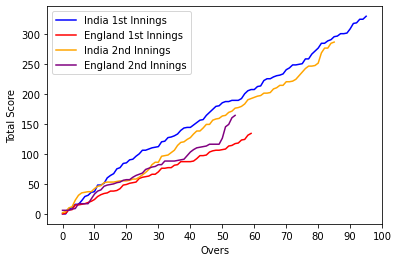

In [15]:
plt.plot(innings_1_data['Over'].unique(), innings_1_data.groupby(['Over']).tail(1)['Total Score'], color='blue', label = 'India 1st Innings')
plt.plot(innings_2_data['Over'].unique(), innings_2_data.groupby(['Over']).tail(1)['Total Score'], color='red', label = 'England 1st Innings')
plt.plot(innings_3_data['Over'].unique(), innings_3_data.groupby(['Over']).tail(1)['Total Score'], color='orange', label = 'India 2nd Innings')
plt.plot(innings_4_data['Over'].unique(), innings_4_data.groupby(['Over']).tail(1)['Total Score'], color='purple', label = 'England 2nd Innings')
plt.xlabel('Overs')
plt.xticks([i for i in range(0, len(innings_1_data['Over'].unique()) + 10, 10)])
plt.ylabel('Total Score')
plt.legend()